In [2]:
!pip install roboflow ultralytics torch torchvision onnx onnxruntime scikit-learn opencv-python tensorflow nvidia-pyindex nvidia-tensorrt zipfile36

In [3]:
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO
from roboflow import Roboflow

In [4]:
### Step 2: Mount Google Drive and Define Paths

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Define the path to the zip file
zip_file_path = '/content/drive/MyDrive/filtered_tiles_output.zip'  # Update this to the actual zip file path

# Define the directory where the dataset will be extracted
dataset_path = '/content/final_tiles'  # Directory to extract files

# Create the output directory for results
output_path = '/content/output_images'
os.makedirs(output_path, exist_ok=True)

# Unzip the dataset if not already extracted
if not os.path.exists(dataset_path):
    import zipfile
    print(f"Extracting {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print(f"Dataset extracted to {dataset_path}.")
else:
    print(f"Dataset already exists at {dataset_path}.")


Dataset already exists at /content/final_tiles.


In [6]:
from roboflow import Roboflow

rf = Roboflow(api_key="IT111k9ZCIpOy2nsvyeI")
project = rf.workspace("jexa").project("melanoma-by-arpita")
version = project.version(3)

# Check if dataset exists locally before downloading
if not os.path.exists("yolov11"):
    dataset = version.download("yolov11")
    print(f"Dataset downloaded and stored at: {dataset.location}")
else:
    print("Dataset already downloaded.")

loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded and stored at: /content/Melanoma-by-Arpita-3


In [7]:
data_yaml_path = os.path.join(dataset.location, 'data.yaml')
if os.path.exists(data_yaml_path):
    model = YOLO("yolo11m-seg.pt")
    model.train(data=data_yaml_path, epochs=100, imgsz=256, batch=16)
    print(f"Model training completed. Best model saved at: {model.best.weights}")
else:
    print(f"Error: Dataset YAML file not found at {data_yaml_path}.")


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/content/Melanoma-by-Arpita-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

train: Scanning /content/Melanoma-by-Arpita-3/train/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Melanoma-by-Arpita-3/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.23G      3.809      4.765       3.98      1.599        771        256: 100%|██████████| 8/8 [00:11<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all         12        669      0.116      0.535      0.148     0.0695      0.113       0.52      0.143     0.0531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.15G      2.466      3.316      1.623      1.076        829        256: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         12        669      0.501      0.807      0.655      0.327       0.44      0.709      0.529      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.31G      2.408      3.245      1.036      1.046       1090        256: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         12        669      0.365      0.592       0.28      0.133       0.26      0.429      0.173     0.0553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.26G      2.233      2.989      1.024      1.005        997        256: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         12        669      0.558      0.697       0.48       0.23      0.474      0.589      0.377      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.33G      2.256      3.059      1.052      1.009        922        256: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         12        669      0.368      0.457      0.237      0.111      0.348      0.428      0.213     0.0784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.34G      2.268      3.018      1.028      1.017        853        256: 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         12        669     0.0296     0.0389      0.011    0.00507     0.0211     0.0299    0.00978     0.0032



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.26G      2.232      2.979      1.043     0.9867        865        256: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         12        669   0.000846    0.00448   0.000428     0.0001          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.35G      2.234      2.932      1.035      1.004        867        256: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         12        669      0.125      0.305     0.0683     0.0312      0.102      0.248     0.0536     0.0213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.25G       2.28      2.968      1.044      1.001       1070        256: 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         12        669      0.683      0.555      0.538      0.275      0.622      0.482      0.448      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.17G      2.237      2.885      1.025     0.9836        914        256: 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         12        669      0.593      0.647       0.55      0.218      0.477       0.52      0.374      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.32G      2.318      2.972      1.138     0.9916        770        256: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         12        669      0.592      0.717       0.56      0.251       0.51      0.643      0.462      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.21G      2.314      2.908      1.063      1.008       1116        256: 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         12        669      0.529      0.707      0.474      0.223      0.498      0.665      0.448      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.22G       2.28       2.94      1.067     0.9872        775        256: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         12        669      0.443      0.692      0.399       0.13      0.323      0.493      0.249     0.0666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.37G      2.355      3.045      1.117      1.008        989        256: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         12        669      0.499      0.769      0.471      0.221      0.485      0.726       0.45      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.26G      2.228      2.863      1.095     0.9923       1059        256: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         12        669      0.621      0.692      0.576      0.237      0.514      0.586      0.442      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.14G      2.211      2.894      1.036     0.9819       1071        256: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         12        669      0.701      0.735      0.698      0.349      0.646      0.689      0.619      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G      2.228      2.895      1.043     0.9812        855        256: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         12        669      0.715      0.738      0.732      0.357      0.655      0.674      0.645      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.19G      2.198      2.869       1.03     0.9779        605        256: 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         12        669      0.739      0.717      0.748      0.343      0.612      0.608      0.575      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.22G      2.258      2.869      1.046     0.9797        922        256: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         12        669      0.791      0.741      0.775      0.385       0.75      0.722      0.742      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.22G      2.088      2.704     0.9977     0.9748        707        256: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         12        669      0.787      0.777      0.803      0.413       0.74      0.725      0.732       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.2G      2.168      2.757      1.005     0.9821        814        256: 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         12        669       0.75      0.768      0.763      0.336      0.602       0.64      0.564      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.21G      2.164      2.825     0.9933     0.9588       1406        256: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         12        669      0.753      0.747      0.779      0.409      0.656      0.663       0.62      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.27G      2.169      2.807      1.012     0.9672        868        256: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         12        669      0.788      0.774      0.804      0.424      0.721      0.728      0.713      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.16G      2.121      2.736     0.9971      0.965        915        256: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         12        669      0.827      0.753      0.818        0.4      0.724      0.659      0.682      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.2G      2.216       2.84      1.013     0.9665        688        256: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         12        669      0.828      0.756      0.831      0.448      0.734      0.676      0.684      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.24G      2.163      2.735      1.024     0.9806        789        256: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         12        669      0.804      0.759      0.805      0.418       0.69      0.646      0.648       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.2G      2.185      2.834      1.026     0.9653       1011        256: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         12        669      0.775      0.777      0.823      0.455      0.688      0.625       0.65      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.21G       2.07      2.674      1.023      0.958        964        256: 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         12        669      0.815      0.797      0.819       0.39      0.699      0.686      0.656      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.22G       2.05      2.552     0.9628     0.9633        779        256: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         12        669      0.842      0.746      0.795      0.448      0.734      0.656      0.667      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.41G      2.167      2.698     0.9908      0.964       1180        256: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         12        669      0.869      0.758       0.83      0.476      0.719      0.753      0.722      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.31G      2.106      2.665      0.983     0.9599        825        256: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         12        669      0.816      0.776      0.827      0.415      0.704      0.634      0.622      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.27G      2.097      2.768     0.9964      0.957        567        256: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         12        669      0.841      0.755      0.818      0.476      0.749      0.673      0.698      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.19G      2.073      2.687      1.004     0.9687        912        256: 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         12        669      0.827      0.779       0.84       0.48      0.736      0.704      0.711      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G      2.034      2.598     0.9729     0.9554        833        256: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         12        669      0.806      0.787      0.834      0.476      0.687      0.668      0.649      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.31G      2.115      2.754     0.9994     0.9488        883        256: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         12        669      0.806      0.764      0.824      0.482      0.713      0.676      0.694       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.21G      2.032      2.628     0.9714     0.9484        824        256: 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         12        669      0.841      0.786      0.838      0.449      0.792      0.709      0.733      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.27G      2.131      2.733     0.9877     0.9579        728        256: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         12        669      0.853       0.78      0.844      0.478      0.721       0.66      0.655      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G      2.078      2.655     0.9951     0.9593        918        256: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         12        669       0.83      0.782      0.836      0.471      0.755      0.703       0.73      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.37G      2.019      2.568     0.9625     0.9404       1041        256: 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         12        669      0.844      0.795      0.854      0.502      0.735      0.685      0.704      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.19G      2.022      2.594     0.9659     0.9445        631        256: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         12        669      0.815      0.775      0.833      0.469      0.707      0.653      0.678      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.37G      1.993      2.529     0.9298       0.94        971        256: 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         12        669      0.793      0.798      0.835      0.451      0.682      0.655      0.639      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.21G      1.957      2.591     0.9508     0.9463       1001        256: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         12        669      0.821       0.81      0.857      0.498      0.726      0.719      0.706      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.2G      2.074      2.604     0.9602     0.9464        772        256: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         12        669      0.825      0.821       0.86      0.474      0.687      0.688      0.669      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G      1.958      2.532      0.952     0.9449        743        256: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         12        669       0.86      0.789      0.853       0.46       0.71      0.652      0.661      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.41G      1.974      2.528     0.9401     0.9387        501        256: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         12        669      0.857      0.785      0.856      0.517      0.791      0.698      0.763      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.19G      2.033      2.611     0.9467      0.951        761        256: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         12        669      0.839      0.795      0.847      0.464       0.73      0.671      0.683      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G      1.902      2.406     0.9118     0.9315        762        256: 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         12        669      0.823      0.818      0.843      0.474      0.684       0.68      0.667      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.26G      1.922      2.445     0.9152     0.9268       1149        256: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         12        669       0.84      0.789      0.846      0.481      0.715      0.651      0.663      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.19G      2.061      2.633     0.9969      0.946       1109        256: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         12        669      0.859      0.795      0.861      0.467      0.709      0.648      0.652      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.2G      1.946      2.432     0.9661     0.9294        780        256: 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         12        669      0.857      0.791      0.855      0.468      0.751      0.698      0.735      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.16G      2.037      2.602     0.9663     0.9519        879        256: 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         12        669      0.854      0.786      0.851      0.508      0.729      0.701      0.725      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.13G      2.002      2.556     0.9557     0.9395        986        256: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         12        669      0.827      0.822      0.857      0.451      0.665      0.612      0.601      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.21G      1.936      2.389     0.9375     0.9291        570        256: 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         12        669      0.831      0.818      0.854      0.431      0.681      0.656      0.621      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.27G       1.98      2.525     0.9673     0.9427        698        256: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         12        669      0.864      0.791      0.856      0.497      0.727      0.745      0.755      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.28G      1.916      2.437     0.9209     0.9275       1135        256: 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         12        669      0.851      0.803      0.858      0.518      0.741      0.692      0.721       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.22G      1.942      2.426     0.9417     0.9232        920        256: 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         12        669      0.864       0.81       0.87      0.507      0.737      0.687      0.723      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.3G      1.888      2.453     0.8996     0.9255       1023        256: 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         12        669      0.848      0.827       0.87      0.503      0.755      0.735      0.757      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.19G      1.929      2.477     0.9146     0.9293        952        256: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         12        669      0.829      0.823      0.864      0.536      0.718      0.694      0.727       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.12G      1.834      2.363     0.9102     0.9219        564        256: 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         12        669      0.847      0.803      0.857      0.498      0.708      0.683      0.697      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.3G      1.906      2.439     0.9068     0.9264        768        256: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         12        669      0.826      0.807      0.853      0.495       0.67      0.671      0.671      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.31G      1.973      2.548     0.9259     0.9248        858        256: 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         12        669      0.833        0.8      0.859      0.524      0.743       0.72      0.747      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.21G      1.891       2.43     0.9279      0.942        656        256: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         12        669      0.819      0.798      0.846      0.482      0.723      0.711      0.712      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.29G      1.875      2.432     0.9109     0.9209        991        256: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         12        669      0.819      0.806      0.849      0.503      0.715      0.713      0.726      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.21G      1.893      2.427     0.9122     0.9258        628        256: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         12        669      0.845      0.791      0.845      0.467       0.73      0.683      0.701       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.2G      1.951      2.437     0.9184     0.9228       1264        256: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         12        669      0.851      0.803      0.854      0.506      0.745      0.702       0.72      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.12G      1.813      2.326     0.8695     0.9186        651        256: 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         12        669      0.845      0.806      0.863      0.535      0.764      0.717      0.758      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.28G      1.813      2.324     0.8781     0.9164        832        256: 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         12        669      0.847      0.819      0.866        0.5      0.727      0.694      0.698      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.3G      1.787      2.265      0.858     0.9033        803        256: 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         12        669      0.847      0.824       0.87      0.498      0.731      0.712      0.702      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.2G      1.882      2.467     0.9035      0.929        848        256: 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         12        669      0.842      0.828      0.871      0.503      0.725      0.686      0.699       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.29G      1.779      2.258      0.847     0.9067        857        256: 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         12        669      0.849      0.813      0.868       0.52      0.716      0.687      0.712      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.3G      1.792      2.306     0.8714     0.9242        564        256: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         12        669      0.849       0.83      0.877      0.539      0.754       0.71      0.751      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.29G      1.939      2.408     0.9057     0.9332       1094        256: 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         12        669      0.856       0.82      0.871      0.525       0.74      0.714      0.739      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.26G      1.819      2.293     0.8906     0.9081        937        256: 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         12        669       0.84      0.806      0.863      0.478      0.683      0.656      0.654      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.27G      1.866       2.41     0.8982     0.9145        847        256: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         12        669      0.811      0.837      0.861      0.493      0.661      0.664      0.624      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.17G       1.79      2.297     0.8833     0.9265       1020        256: 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         12        669      0.831      0.839       0.87      0.535      0.721      0.712      0.729      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G       1.86      2.325     0.8782     0.9115        745        256: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         12        669      0.862        0.8      0.868      0.515      0.756      0.701      0.738      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.2G      1.797      2.323     0.8544     0.9159        554        256: 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         12        669      0.841      0.835      0.876      0.515      0.725       0.72      0.708      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.26G       1.79      2.289     0.8506     0.9062        894        256: 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         12        669      0.835      0.846      0.882       0.51      0.722      0.731      0.712      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.21G      1.783      2.278     0.8465     0.9059        928        256: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         12        669      0.837       0.83      0.868      0.504      0.724      0.744      0.718      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.27G      1.794      2.271     0.8561     0.9124        868        256: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         12        669      0.824      0.841       0.87      0.517      0.698      0.709      0.694      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.37G      1.782      2.319      0.845     0.9106        868        256: 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         12        669      0.838      0.833      0.869      0.513      0.703        0.7      0.682       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.12G      1.752      2.221     0.8469     0.9081        718        256: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         12        669      0.824      0.834      0.863      0.511      0.704      0.714        0.7       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.2G      1.766      2.241     0.8274     0.9043       1072        256: 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         12        669       0.84      0.839      0.864      0.533      0.727      0.738      0.741       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.3G      1.817      2.318     0.8485     0.9139        786        256: 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         12        669      0.849      0.833      0.872      0.554      0.767      0.761      0.777      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.26G      1.792      2.277     0.8468     0.9114        817        256: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         12        669       0.86      0.836      0.881      0.538      0.749      0.732      0.734      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.3G      1.839      2.371     0.8774     0.9139       1055        256: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         12        669      0.836      0.851      0.884      0.521      0.717      0.743      0.729       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.31G      1.781      2.255     0.8405     0.9001        777        256: 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         12        669      0.829      0.851       0.88      0.521      0.713      0.735      0.728      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.28G      1.841      2.328     0.8694     0.9159        888        256: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         12        669      0.853      0.832      0.879      0.542      0.734      0.737      0.748       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.17G      1.788       2.23      0.856     0.9055        577        256: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         12        669      0.845      0.842       0.88      0.555      0.748       0.74      0.762      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.25G      1.721      2.175     0.8187     0.8884        823        256: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         12        669      0.866      0.818       0.88      0.546      0.738       0.74      0.746      0.282


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.16G      1.727      2.252     0.8627     0.9114        591        256: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         12        669      0.865      0.814      0.878      0.547       0.75      0.723      0.737      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.1G      1.695       2.16     0.8398     0.9173        771        256: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         12        669      0.863      0.813      0.878      0.545      0.756      0.719      0.743      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.17G      1.718      2.208     0.8402     0.9194        687        256: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         12        669      0.867      0.803      0.872      0.541      0.757      0.703      0.732      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.15G      1.715      2.182     0.8462     0.9031        485        256: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         12        669      0.847      0.811      0.873      0.538      0.716      0.729      0.715      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.2G       1.68      2.208     0.8339     0.9052        521        256: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         12        669       0.84      0.825       0.88      0.532      0.722      0.707      0.705      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.12G      1.658      2.131     0.8283     0.9035        634        256: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         12        669      0.845      0.831      0.881      0.532       0.73      0.706      0.705      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.2G      1.692      2.139     0.8387     0.9118        792        256: 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         12        669      0.856      0.828      0.881      0.528      0.735      0.709      0.718      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.22G      1.704      2.163     0.8269     0.9104        564        256: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         12        669      0.859       0.83      0.881      0.536      0.743      0.717       0.73      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.15G      1.731      2.228     0.8295     0.9013        682        256: 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         12        669      0.866      0.827      0.881      0.537      0.744      0.713      0.733      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.12G      1.648      2.078     0.8095     0.9032        544        256: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         12        669       0.87      0.825      0.879      0.538      0.749      0.712       0.73      0.281



100 epochs completed in 0.291 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 45.1MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 45.1MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


                   all         12        669      0.849      0.833      0.872      0.553      0.767      0.761      0.778       0.31
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/train2


AttributeError: 'YOLO' object has no attribute 'best'

In [8]:
def plot_combined_green_mask(image, results):
    combined_green_mask = np.zeros_like(image, dtype=np.uint8)

    for mask in results[0].masks.data:  # Access masks from the results
        mask_array = mask.cpu().numpy().astype(np.uint8)
        combined_green_mask[mask_array == 1] = [0, 255, 0]

    output_image = cv2.addWeighted(image, 1, combined_green_mask, 0.5, 0)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Number of cells: {len(results[0].boxes)}")
    plt.show()



0: 256x256 300 Cell-M3yVs, 18.8ms
Speed: 0.8ms preprocess, 18.8ms inference, 20.3ms postprocess per image at shape (1, 3, 256, 256)


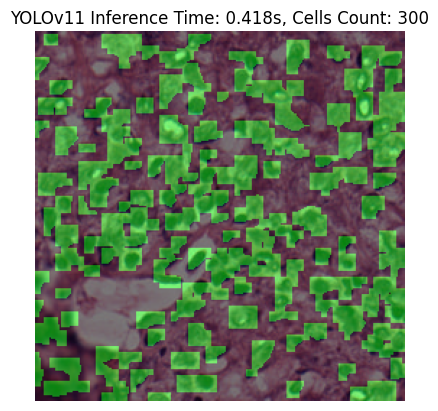

In [9]:
# Load YOLOv11 model after training
model = YOLO('/content/runs/segment/train/weights/best.pt')

# Define the dataset path correctly
dataset_path = '/content/final_tiles'  # Adjust to your actual dataset path
image_path = f"/content/final_tiles/tile_10240_11008.png"  # Update to an actual image file

# Check if the image file exists
if os.path.exists(image_path):
    # Load and preprocess the sample image
    image = cv2.imread(image_path)

    if image is not None:
        resized_image = cv2.resize(image, (256, 256))

        # Perform YOLOv11 inference and measure time
        start_time = time.time()
        results = model(resized_image, imgsz=(256, 256))
        inference_time_yolo = time.time() - start_time

        # Create a mask image with the same size as the original image
        mask_image = np.zeros_like(resized_image)

        # Iterate through detected masks and color them green
        for mask in results[0].masks.data:  # Access mask data
            mask_cpu = mask.cpu().numpy().astype(np.uint8)  # Ensure mask is on CPU and in the right format
            mask_image[mask_cpu == 1] = [0, 255, 0]  # Set mask region to green

        # Combine the mask with the original image using bitwise OR
        output_image = cv2.addWeighted(resized_image, 0.5, mask_image, 0.5, 0)

        # Display only the masked image
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"YOLOv11 Inference Time: {inference_time_yolo:.3f}s, Cells Count: {len(results[0].boxes)}")
        plt.axis('off')
        plt.show()

    else:
        print(f"Error: Could not read image at {image_path}")
else:
    print(f"Error: Image file does not exist at {image_path}")


In [11]:
# Ensure dataset_path exists and contains image files
dataset_path = '/content/final_tiles'
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg'))]

if not image_files:
    raise ValueError("No image files found in the specified path.")

# Metrics initialization
total_inference_time = 0
total_cell_count = 0

# Perform inference
for image_path in image_files:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Skipping invalid image: {image_path}")
        continue

    resized_image = cv2.resize(image, (256, 256))
    start_time = time.time()
    results = model(resized_image, imgsz=(256, 256))
    inference_time = time.time() - start_time

    total_inference_time += inference_time
    total_cell_count += len(results[0].boxes)



# Final metrics
num_images = len(image_files)
average_inference_time = total_inference_time / num_images if num_images else 0

print(f"Total Images Processed: {num_images}")
print(f"Total Cells Counted: {total_cell_count}")
print(f"Total Inference Time: {total_inference_time:.3f} seconds")
print(f"Average Inference Time per Image: {average_inference_time:.3f} seconds")


Streaming output truncated to the last 5000 lines.
Speed: 0.6ms preprocess, 23.7ms inference, 14.8ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 130 Cell-M3yVs, 19.6ms
Speed: 0.7ms preprocess, 19.6ms inference, 8.3ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 (no detections), 19.9ms
Speed: 0.9ms preprocess, 19.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 46 Cell-M3yVs, 20.2ms
Speed: 0.6ms preprocess, 20.2ms inference, 5.1ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 268 Cell-M3yVs, 19.9ms
Speed: 0.6ms preprocess, 19.9ms inference, 13.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 25 Cell-M3yVs, 20.0ms
Speed: 0.6ms preprocess, 20.0ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 37 Cell-M3yVs, 19.8ms
Speed: 0.7ms preprocess, 19.8ms inference, 4.7ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 300 Cell-M3yVs, 25.5ms
Speed: 0.6ms preprocess, 